# Hopfield Network

Developer: Thiago Fellipe Ortiz de Camargo

## Standard Imports

In [162]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

## Hopfield

In [163]:
class hopfield(object):
    
    def __init__(self, patterns, noise_percentage, pattern_n_row, pattern_n_column, ib, epochs, neta):
        self.patterns = patterns
        self.noise    = 1-noise_percentage
        self.nrow     = pattern_n_row
        self.ncol     = pattern_n_column
        self.fmn      = len(patterns)
        self.dim      = len(self.patterns[0])
        self.ib       = ib
        self.epc      = epochs
        self.scape    = False
        self.n        = neta
        
    def noise_attribution(self, patt):
        self.pattern = patt
        self.randM   = np.random.rand(self.nrow,self.ncol)
        self.auxA    = self.noise > self.randM
        self.auxB    = self.noise < self.randM
        self.randM[self.auxA] =  1
        self.randM[self.auxB] = -1
        self.new_patter       = self.pattern.reshape(self.nrow,self.ncol)*self.randM
        return self.new_patter.reshape(self.dim,1)
    
    def weights(self):
        self.auxW = 0
        
        for patt in self.patterns:
            self.auxW += patt*patt.reshape(self.dim,1)
            
        a = 1/self.dim
        b = self.fmn/self.dim
            
        #self.W = np.array(((1/self.dim)*self.auxW)-((self.fmn/self.dim)*np.zeros((self.dim, self.dim))))
        self.W = (a*self.auxW)-(b*np.zeros((self.dim,self.dim)))
    
    def run(self):
        
        self.weights()
        self.it_patt    = []
        self.outputs    = pd.DataFrame()
        self.noised_img = pd.DataFrame()
        
        for patt in self.patterns:
            self.v_current  = self.noise_attribution(patt)
            self.noised_img = pd.concat((self.noised_img, pd.DataFrame(self.v_current).T))       
            self.it = 0
            self.scape = False

            while(self.scape == False):
                self.v_past    = self.v_current
                self.u         = np.dot(self.W,self.v_past)+self.ib
                self.u        -= self.n*self.u
                self.v_current = np.sign(np.tanh(self.u))

                if pd.DataFrame(self.v_current).equals(pd.DataFrame(self.v_past)):
                    self.scape = True

                if(self.it >= self.epc):
                    self.scape = True

                self.it += 1
            self.it_patt.append(self.it)
                
            self.outputs = pd.concat((self.outputs,pd.DataFrame(self.v_current).T))
    
    

## Examples

In [95]:
N1 = np.array((-1, -1, 1, 1, -1, -1, 1, 1, 1, -1, -1, -1, 1, 1, -1, -1, -1, 1, 1, -1, -1, -1, 1, 1, -1, -1, -1, 1, 1, -1, -1, -1, 1, 1, -1, -1, -1, 1, 1, -1, -1, -1, 1, 1, -1))
N2 = np.array((1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, -1, -1, 1, 1, -1, -1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, -1, -1, 1, 1, -1, -1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1))
N3 = np.array((1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, -1, -1, 1, 1, -1, -1, -1, 1, 1, 1, 1, 1, 1, 1, -1, -1, -1, 1, 1, -1, -1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1))
N4 = np.array((1, 1, -1, 1, 1, 1, 1, -1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, -1, -1, 1, 1, -1, -1, -1, 1, 1, -1, -1, -1, 1, 1, -1, -1, -1, 1, 1))
N = np.array((N1, N2, N3, N4))

In [102]:
hp = hopfield(patterns=N, noise_percentage=0.08, 
              pattern_n_row=9, pattern_n_column=5, ib=0, epochs=100000, neta = 0.1)
hp.run()

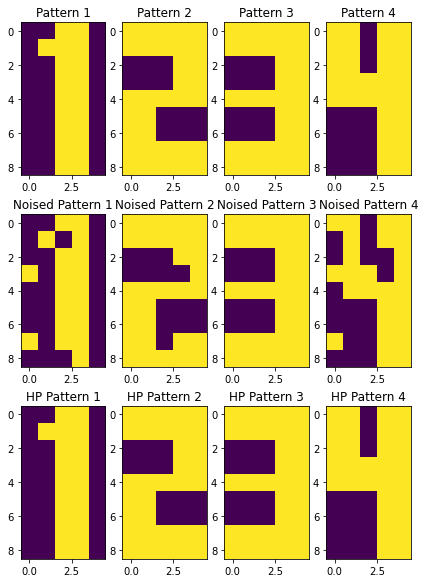

In [103]:
fig, axs = plt.subplots(nrows=3, ncols=4, figsize=(7, 10))

# ------- N1 -------
axs[0][0].set_title('Pattern 1')
axs[0][0].imshow(N1.reshape(9,5))

axs[1][0].set_title('Noised Pattern 1')
axs[1][0].imshow(hp.noised_img.iloc[0,:].values.reshape(9,5))

axs[2][0].set_title('HP Pattern 1')
axs[2][0].imshow(hp.outputs.iloc[0,:].values.reshape(9,5))


# ------- N2 -------
axs[0][1].set_title('Pattern 2')
axs[0][1].imshow(N2.reshape(9,5))

axs[1][1].set_title('Noised Pattern 2')
axs[1][1].imshow(hp.noised_img.iloc[1,:].values.reshape(9,5))

axs[2][1].set_title('HP Pattern 2')
axs[2][1].imshow(hp.outputs.iloc[1,:].values.reshape(9,5))


# ------- N3 -------
axs[0][2].set_title('Pattern 3')
axs[0][2].imshow(N3.reshape(9,5))

axs[1][2].set_title('Noised Pattern 3')
axs[1][2].imshow(hp.noised_img.iloc[2,:].values.reshape(9,5))

axs[2][2].set_title('HP Pattern 3')
axs[2][2].imshow(hp.outputs.iloc[2,:].values.reshape(9,5))


# ------- N4 -------
axs[0][3].set_title('Pattern 4')
axs[0][3].imshow(N4.reshape(9,5))

axs[1][3].set_title('Noised Pattern 4')
axs[1][3].imshow(hp.noised_img.iloc[3,:].values.reshape(9,5))

axs[2][3].set_title('HP Pattern 4')
axs[2][3].imshow(np.sign(hp.outputs.iloc[3,:].values.reshape(9,5)))



plt.show()

## Libraries

### Livro

In [7]:
livro = pd.read_table(r'F:\Desktop\8P\8P-2\Redes Neurais\Listas\Lista 3\Hopfield\Hopfield\livro.txt', sep = ' ')

In [191]:
hp = hopfield(patterns=livro.values, noise_percentage=0.5,
              pattern_n_row=12, pattern_n_column=10, ib=0, epochs=50000, neta = 0)
hp.run()

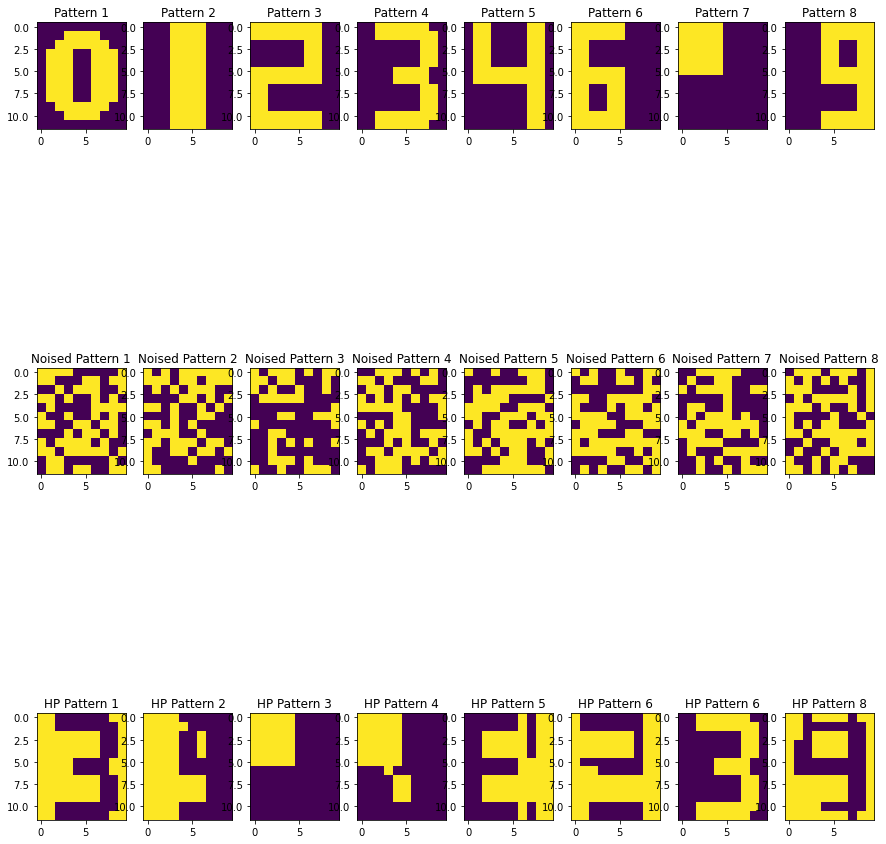

In [192]:
nrow = 12
ncol = 10


fig, axs = plt.subplots(nrows=3, ncols=8, figsize=(15, 18), squeeze=False)

# ------- P1 -------
axs[0,0].set_title('Pattern 1')
axs[0,0].imshow(livro.values[0].reshape(nrow,ncol))

axs[1,0].set_title('Noised Pattern 1')
axs[1,0].imshow(hp.noised_img.iloc[0,:].values.reshape(nrow,ncol))

axs[2,0].set_title('HP Pattern 1')
axs[2,0].imshow(hp.outputs.iloc[0,:].values.reshape(nrow,ncol))


# ------- P2 -------
axs[0,1].set_title('Pattern 2')
axs[0,1].imshow(livro.values[1].reshape(nrow,ncol))

axs[1,1].set_title('Noised Pattern 2')
axs[1,1].imshow(hp.noised_img.iloc[1,:].values.reshape(nrow,ncol))

axs[2,1].set_title('HP Pattern 2')
axs[2,1].imshow(hp.outputs.iloc[1,:].values.reshape(nrow,ncol))


# ------- P3 -------
axs[0,2].set_title('Pattern 3')
axs[0,2].imshow(livro.values[2].reshape(nrow,ncol))

axs[1,2].set_title('Noised Pattern 3')
axs[1,2].imshow(hp.noised_img.iloc[2,:].values.reshape(nrow,ncol))

axs[2,2].set_title('HP Pattern 3')
axs[2,2].imshow(hp.outputs.iloc[2,:].values.reshape(nrow,ncol))


# ------- P4 -------
axs[0,3].set_title('Pattern 4')
axs[0,3].imshow(livro.values[3].reshape(nrow,ncol))

axs[1,3].set_title('Noised Pattern 4')
axs[1,3].imshow(hp.noised_img.iloc[3,:].values.reshape(nrow,ncol))

axs[2,3].set_title('HP Pattern 4')
axs[2,3].imshow(hp.outputs.iloc[3,:].values.reshape(nrow,ncol))


# ------- P5 -------
axs[0,4].set_title('Pattern 5')
axs[0,4].imshow(livro.values[4].reshape(nrow,ncol))

axs[1,4].set_title('Noised Pattern 5')
axs[1,4].imshow(hp.noised_img.iloc[4,:].values.reshape(nrow,ncol))

axs[2,4].set_title('HP Pattern 5')
axs[2,4].imshow(hp.outputs.iloc[4,:].values.reshape(nrow,ncol))


# ------- P6 -------
axs[0,5].set_title('Pattern 6')
axs[0,5].imshow(livro.values[5].reshape(nrow,ncol))

axs[1,5].set_title('Noised Pattern 6')
axs[1,5].imshow(hp.noised_img.iloc[5,:].values.reshape(nrow,ncol))

axs[2,5].set_title('HP Pattern 6')
axs[2,5].imshow(hp.outputs.iloc[5,:].values.reshape(nrow,ncol))


# ------- P7 -------
axs[0,6].set_title('Pattern 7')
axs[0,6].imshow(livro.values[6].reshape(nrow,ncol))

axs[1,6].set_title('Noised Pattern 7')
axs[1,6].imshow(hp.noised_img.iloc[6,:].values.reshape(nrow,ncol))

axs[2,6].set_title('HP Pattern 6')
axs[2,6].imshow(hp.outputs.iloc[6,:].values.reshape(nrow,ncol))


# ------- P8 -------
axs[0,7].set_title('Pattern 8')
axs[0,7].imshow(livro.values[7].reshape(nrow,ncol))

axs[1,7].set_title('Noised Pattern 8')
axs[1,7].imshow(hp.noised_img.iloc[7,:].values.reshape(nrow,ncol))

axs[2,7].set_title('HP Pattern 8')
axs[2,7].imshow(hp.outputs.iloc[7,:].values.reshape(nrow,ncol))


plt.show()

In [193]:
perc = []
acerto = 0

for elemento, out in zip(livro.values,hp.outputs.values):
    
    erro   = 0
    
    for i in range(nrow*ncol):
        if elemento[i] != out[i]:
            erro += 1
        else:
            acerto += 1
            
            
    perc.append(erro)

total_perc = np.array(perc)*100/(nrow*ncol)
med_perc   = np.mean(total_perc)

acerto_perc = (acerto*100)/(hp.ncol*hp.nrow*hp.fmn)

print('Acerto %: '+np.str(acerto_perc))
print('Erro medio %:'+np.str(med_perc))

Acerto %: 44.791666666666664
Erro medio %:55.20833333333333


P   - EM        - AC
8%  = 0          100
10% = 0          100
25% = 0.42       99.58     
50% = 55.21      44.79

### Numbers

In [66]:
numbers = pd.read_table(r'F:\Desktop\8P\8P-2\Redes Neurais\Listas\Lista 3\Hopfield\Hopfield\numeros.txt', sep = ' ')

In [209]:
hp = hopfield(patterns=numbers.values, noise_percentage=0.5, 
              pattern_n_row=7, pattern_n_column=5, ib=0, epochs=1000, neta = 0)
hp.run()

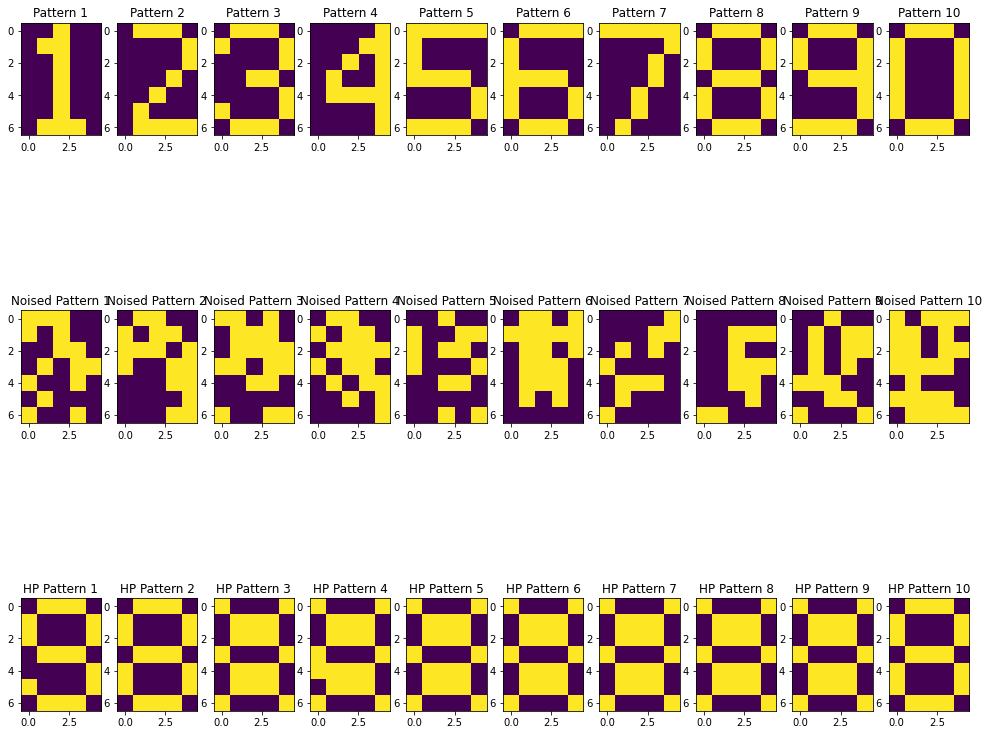

In [210]:
nrow = 7
ncol = 5


fig, axs = plt.subplots(nrows=3, ncols=10, figsize=(17, 15), squeeze=False)

# ------- P1 -------
axs[0,0].set_title('Pattern 1')
axs[0,0].imshow(numbers.values[0].reshape(nrow,ncol))

axs[1,0].set_title('Noised Pattern 1')
axs[1,0].imshow(hp.noised_img.iloc[0,:].values.reshape(nrow,ncol))

axs[2,0].set_title('HP Pattern 1')
axs[2,0].imshow(hp.outputs.iloc[0,:].values.reshape(nrow,ncol))


# ------- P2 -------
axs[0,1].set_title('Pattern 2')
axs[0,1].imshow(numbers.values[1].reshape(nrow,ncol))

axs[1,1].set_title('Noised Pattern 2')
axs[1,1].imshow(hp.noised_img.iloc[1,:].values.reshape(nrow,ncol))

axs[2,1].set_title('HP Pattern 2')
axs[2,1].imshow(hp.outputs.iloc[1,:].values.reshape(nrow,ncol))


# ------- P3 -------
axs[0,2].set_title('Pattern 3')
axs[0,2].imshow(numbers.values[2].reshape(nrow,ncol))

axs[1,2].set_title('Noised Pattern 3')
axs[1,2].imshow(hp.noised_img.iloc[2,:].values.reshape(nrow,ncol))

axs[2,2].set_title('HP Pattern 3')
axs[2,2].imshow(hp.outputs.iloc[2,:].values.reshape(nrow,ncol))


# ------- P4 -------
axs[0,3].set_title('Pattern 4')
axs[0,3].imshow(numbers.values[3].reshape(nrow,ncol))

axs[1,3].set_title('Noised Pattern 4')
axs[1,3].imshow(hp.noised_img.iloc[3,:].values.reshape(nrow,ncol))

axs[2,3].set_title('HP Pattern 4')
axs[2,3].imshow(hp.outputs.iloc[3,:].values.reshape(nrow,ncol))


# ------- P5 -------
axs[0,4].set_title('Pattern 5')
axs[0,4].imshow(numbers.values[4].reshape(nrow,ncol))

axs[1,4].set_title('Noised Pattern 5')
axs[1,4].imshow(hp.noised_img.iloc[4,:].values.reshape(nrow,ncol))

axs[2,4].set_title('HP Pattern 5')
axs[2,4].imshow(hp.outputs.iloc[4,:].values.reshape(nrow,ncol))


# ------- P6 -------
axs[0,5].set_title('Pattern 6')
axs[0,5].imshow(numbers.values[5].reshape(nrow,ncol))

axs[1,5].set_title('Noised Pattern 6')
axs[1,5].imshow(hp.noised_img.iloc[5,:].values.reshape(nrow,ncol))

axs[2,5].set_title('HP Pattern 6')
axs[2,5].imshow(hp.outputs.iloc[5,:].values.reshape(nrow,ncol))


# ------- P7 -------
axs[0,6].set_title('Pattern 7')
axs[0,6].imshow(numbers.values[6].reshape(nrow,ncol))

axs[1,6].set_title('Noised Pattern 7')
axs[1,6].imshow(hp.noised_img.iloc[6,:].values.reshape(nrow,ncol))

axs[2,6].set_title('HP Pattern 7')
axs[2,6].imshow(hp.outputs.iloc[6,:].values.reshape(nrow,ncol))


# ------- P8 -------
axs[0,7].set_title('Pattern 8')
axs[0,7].imshow(numbers.values[7].reshape(nrow,ncol))

axs[1,7].set_title('Noised Pattern 8')
axs[1,7].imshow(hp.noised_img.iloc[7,:].values.reshape(nrow,ncol))

axs[2,7].set_title('HP Pattern 8')
axs[2,7].imshow(hp.outputs.iloc[7,:].values.reshape(nrow,ncol))


# ------- P9 -------
axs[0,8].set_title('Pattern 9')
axs[0,8].imshow(numbers.values[8].reshape(nrow,ncol))

axs[1,8].set_title('Noised Pattern 9')
axs[1,8].imshow(hp.noised_img.iloc[8,:].values.reshape(nrow,ncol))

axs[2,8].set_title('HP Pattern 9')
axs[2,8].imshow(hp.outputs.iloc[8,:].values.reshape(nrow,ncol))

# ------- P10 -------
axs[0,9].set_title('Pattern 10')
axs[0,9].imshow(numbers.values[9].reshape(nrow,ncol))

axs[1,9].set_title('Noised Pattern 10')
axs[1,9].imshow(hp.noised_img.iloc[9,:].values.reshape(nrow,ncol))

axs[2,9].set_title('HP Pattern 10')
axs[2,9].imshow(hp.outputs.iloc[9,:].values.reshape(nrow,ncol))


plt.show()

In [211]:
perc = []

for elemento, out in zip(numbers.values,hp.outputs.values):
    erro = 0
    for i in range(nrow*ncol):
        if elemento[i] != out[i]:
            erro += 1
        
    perc.append(erro)

total_perc = np.array(perc)*100/(nrow*ncol)
med_perc   = np.mean(total_perc)
med_perc

63.71428571428571

8%  = 17.71
10% = 23.42
25% = 22.51
50% = 63.71

### Letras

In [19]:
letters = pd.read_csv(r'F:\Desktop\8P\8P-2\Redes Neurais\Listas\Lista 3\Hopfield\Hopfield\LETRAS.csv', sep = ' ')

In [222]:
hp = hopfield(patterns=letters.values, noise_percentage=0.5, 
              pattern_n_row=20, pattern_n_column=20, ib=0, epochs=100, neta = 0.05)
hp.run()

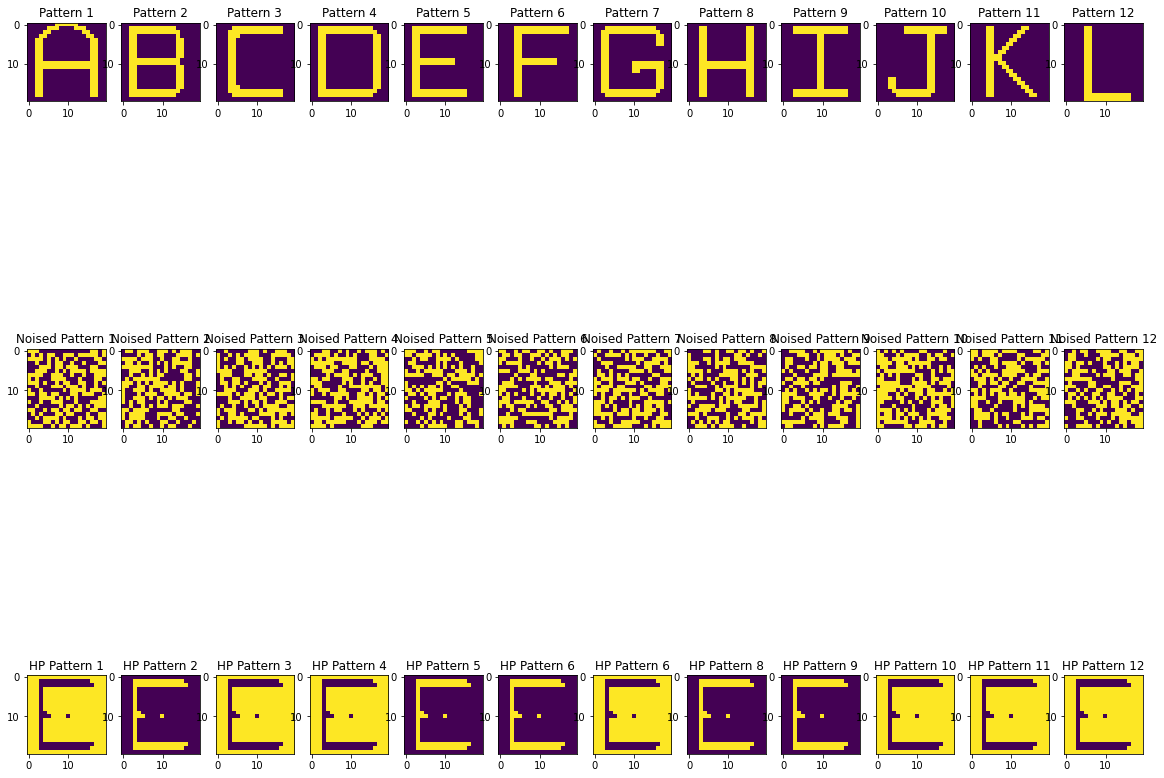

In [223]:
nrow = 20
ncol = 20


fig, axs = plt.subplots(nrows=3, ncols=12, figsize=(20, 17), squeeze=False)

# ------- P1 -------
axs[0,0].set_title('Pattern 1')
axs[0,0].imshow(letters.values[0].reshape(nrow,ncol))

axs[1,0].set_title('Noised Pattern 1')
axs[1,0].imshow(hp.noised_img.iloc[0,:].values.reshape(nrow,ncol))

axs[2,0].set_title('HP Pattern 1')
axs[2,0].imshow(hp.outputs.iloc[0,:].values.reshape(nrow,ncol))


# ------- P2 -------
axs[0,1].set_title('Pattern 2')
axs[0,1].imshow(letters.values[1].reshape(nrow,ncol))

axs[1,1].set_title('Noised Pattern 2')
axs[1,1].imshow(hp.noised_img.iloc[1,:].values.reshape(nrow,ncol))

axs[2,1].set_title('HP Pattern 2')
axs[2,1].imshow(hp.outputs.iloc[1,:].values.reshape(nrow,ncol))


# ------- P3 -------
axs[0,2].set_title('Pattern 3')
axs[0,2].imshow(letters.values[2].reshape(nrow,ncol))

axs[1,2].set_title('Noised Pattern 3')
axs[1,2].imshow(hp.noised_img.iloc[2,:].values.reshape(nrow,ncol))

axs[2,2].set_title('HP Pattern 3')
axs[2,2].imshow(hp.outputs.iloc[2,:].values.reshape(nrow,ncol))


# ------- P4 -------
axs[0,3].set_title('Pattern 4')
axs[0,3].imshow(letters.values[3].reshape(nrow,ncol))

axs[1,3].set_title('Noised Pattern 4')
axs[1,3].imshow(hp.noised_img.iloc[3,:].values.reshape(nrow,ncol))

axs[2,3].set_title('HP Pattern 4')
axs[2,3].imshow(hp.outputs.iloc[3,:].values.reshape(nrow,ncol))


# ------- P5 -------
axs[0,4].set_title('Pattern 5')
axs[0,4].imshow(letters.values[4].reshape(nrow,ncol))

axs[1,4].set_title('Noised Pattern 5')
axs[1,4].imshow(hp.noised_img.iloc[4,:].values.reshape(nrow,ncol))

axs[2,4].set_title('HP Pattern 5')
axs[2,4].imshow(hp.outputs.iloc[4,:].values.reshape(nrow,ncol))


# ------- P6 -------
axs[0,5].set_title('Pattern 6')
axs[0,5].imshow(letters.values[5].reshape(nrow,ncol))

axs[1,5].set_title('Noised Pattern 6')
axs[1,5].imshow(hp.noised_img.iloc[5,:].values.reshape(nrow,ncol))

axs[2,5].set_title('HP Pattern 6')
axs[2,5].imshow(hp.outputs.iloc[5,:].values.reshape(nrow,ncol))


# ------- P7 -------
axs[0,6].set_title('Pattern 7')
axs[0,6].imshow(letters.values[6].reshape(nrow,ncol))

axs[1,6].set_title('Noised Pattern 7')
axs[1,6].imshow(hp.noised_img.iloc[6,:].values.reshape(nrow,ncol))

axs[2,6].set_title('HP Pattern 6')
axs[2,6].imshow(hp.outputs.iloc[6,:].values.reshape(nrow,ncol))


# ------- P8 -------
axs[0,7].set_title('Pattern 8')
axs[0,7].imshow(letters.values[7].reshape(nrow,ncol))

axs[1,7].set_title('Noised Pattern 8')
axs[1,7].imshow(hp.noised_img.iloc[7,:].values.reshape(nrow,ncol))

axs[2,7].set_title('HP Pattern 8')
axs[2,7].imshow(hp.outputs.iloc[7,:].values.reshape(nrow,ncol))


# ------- P9 -------
axs[0,8].set_title('Pattern 9')
axs[0,8].imshow(letters.values[8].reshape(nrow,ncol))

axs[1,8].set_title('Noised Pattern 9')
axs[1,8].imshow(hp.noised_img.iloc[8,:].values.reshape(nrow,ncol))

axs[2,8].set_title('HP Pattern 9')
axs[2,8].imshow(hp.outputs.iloc[8,:].values.reshape(nrow,ncol))


# ------- P10 -------
axs[0,9].set_title('Pattern 10')
axs[0,9].imshow(letters.values[9].reshape(nrow,ncol))

axs[1,9].set_title('Noised Pattern 10')
axs[1,9].imshow(hp.noised_img.iloc[9,:].values.reshape(nrow,ncol))

axs[2,9].set_title('HP Pattern 10')
axs[2,9].imshow(hp.outputs.iloc[9,:].values.reshape(nrow,ncol))


# ------- P11 -------
axs[0,10].set_title('Pattern 11')
axs[0,10].imshow(letters.values[10].reshape(nrow,ncol))

axs[1,10].set_title('Noised Pattern 11')
axs[1,10].imshow(hp.noised_img.iloc[10,:].values.reshape(nrow,ncol))

axs[2,10].set_title('HP Pattern 11')
axs[2,10].imshow(hp.outputs.iloc[10,:].values.reshape(nrow,ncol))


# ------- P12 -------
axs[0,11].set_title('Pattern 12')
axs[0,11].imshow(letters.values[11].reshape(nrow,ncol))

axs[1,11].set_title('Noised Pattern 12')
axs[1,11].imshow(hp.noised_img.iloc[11,:].values.reshape(nrow,ncol))

axs[2,11].set_title('HP Pattern 12')
axs[2,11].imshow(hp.outputs.iloc[11,:].values.reshape(nrow,ncol))

In [224]:
perc = []

for elemento, out in zip(letters.values,hp.outputs.values):
    erro = 0
    for i in range(nrow*ncol):
        if elemento[i] != out[i]:
            erro += 1
        
    perc.append(erro)

total_perc = np.array(perc)*100/(nrow*ncol)
med_perc   = np.mean(total_perc)
med_perc

54.729166666666664

8%  = 17.35
10% = 17.35
25% = 17.37
50% = 54.73

In [33]:
classes = [1.3, 1.65, 1.75, 2]
labels  = ['1 - baixa', '2 - media', '3 - Alta']

In [34]:
x = [1.3 , 1.45, 1.65 , 1.75, 1.9]

In [35]:
a = pd.cut( x = x,
        bins = classes,
        right = False,
        labels = labels,
        include_lowest = True)

In [36]:
x

[1.3, 1.45, 1.65, 1.75, 1.9]

In [37]:
a

['1 - baixa', '1 - baixa', '2 - media', '3 - Alta', '3 - Alta']
Categories (3, object): ['1 - baixa' < '2 - media' < '3 - Alta']

In [419]:
pd.cut( x = x,
        bins = classes,
        right = True,
        labels = labels,
        include_lowest = True)

['1 - baixa', '1 - baixa', '1 - baixa', '2 - media', '3 - Alta']
Categories (3, object): ['1 - baixa' < '2 - media' < '3 - Alta']

In [420]:
pd.cut( x = x,
        bins = classes,
        labels = labels,
        right = False,
        include_lowest = True)

['1 - baixa', '1 - baixa', '2 - media', '3 - Alta', '3 - Alta']
Categories (3, object): ['1 - baixa' < '2 - media' < '3 - Alta']